In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate
from scipy import optimize

(0.0, 0.52)

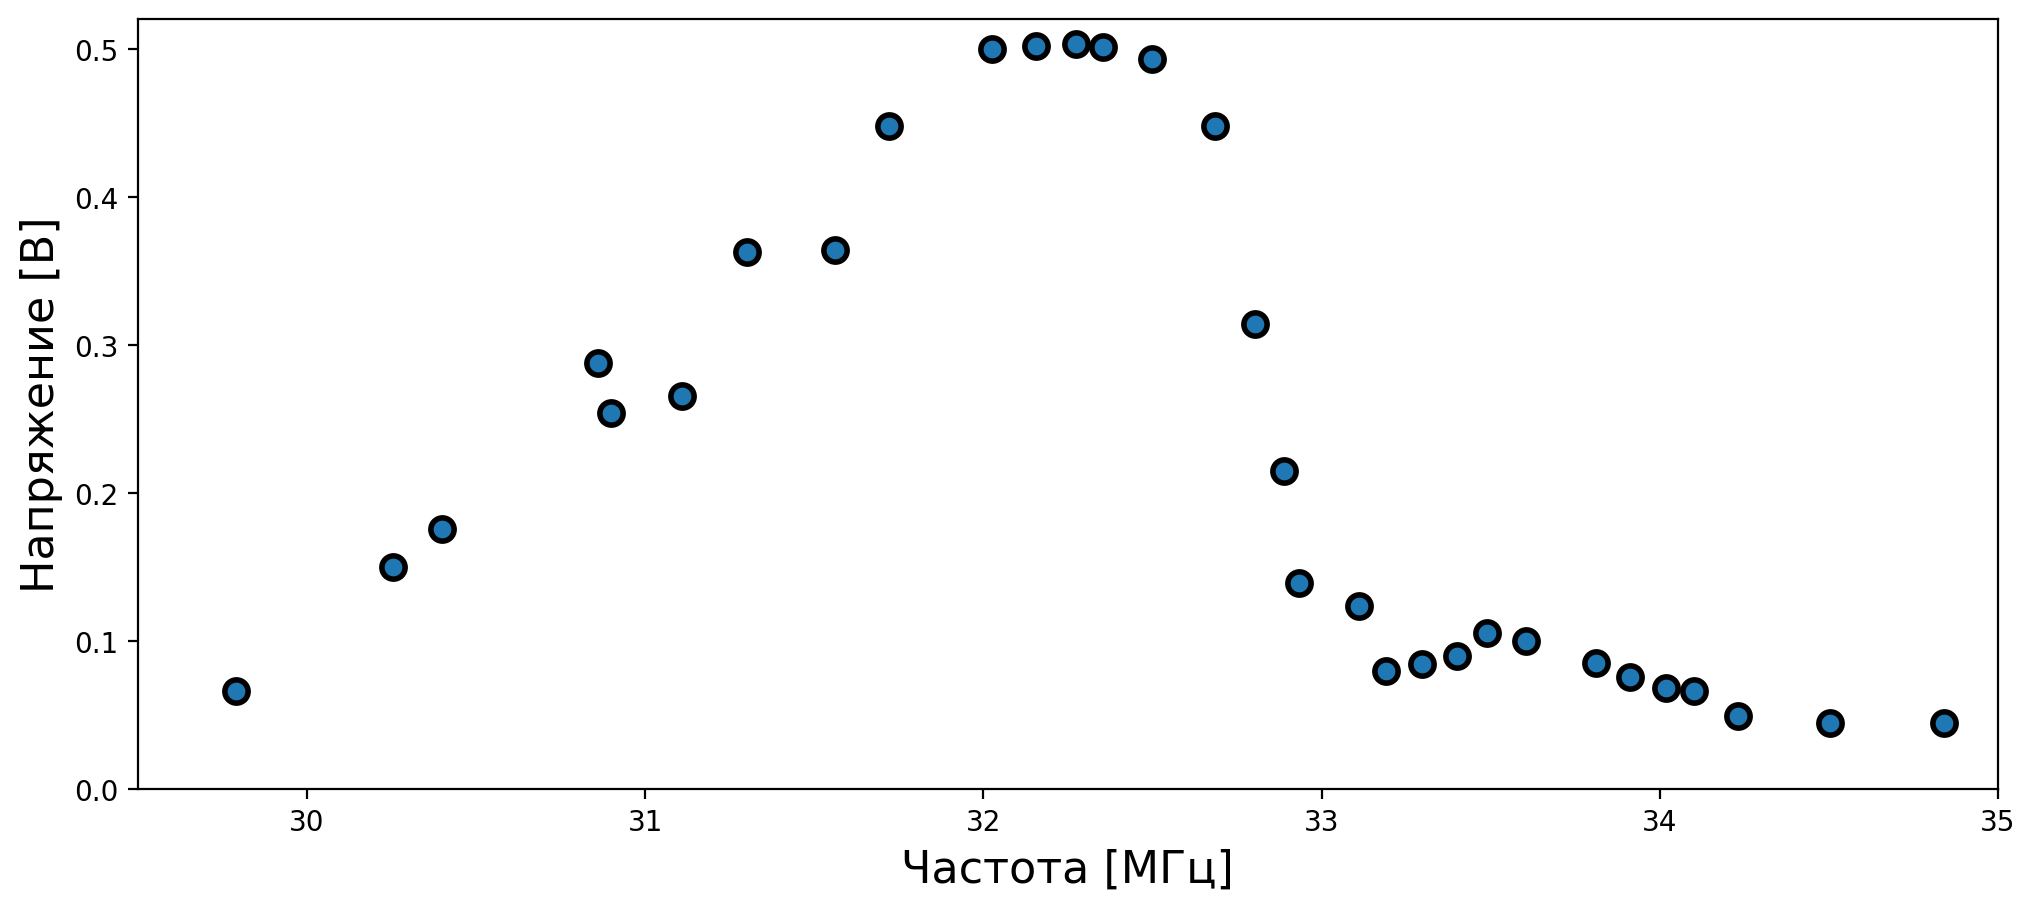

In [4]:

data = pd.read_csv("angle_30.csv")


plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(data['freq[MHz]'], 0.25 - data['U[V]'], s = 70, edgecolors='black', linewidth = 2)
plt.xlabel("Частота [МГц]", fontsize = 16)
plt.ylabel("Напряжение [В]", fontsize= 16)

plt.xlim(29.5, 35)
plt.ylim(0, 0.52)